In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.groupby('Sex')["Survived"].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [7]:
train.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

In [8]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
numeric_features = ['Age','Fare','SibSp','Parch']
categorical_features = ['Embarked','Sex']

In [10]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [12]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [13]:
X = train.drop("Survived", axis =1)
y= train['Survived']

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [15]:
clf.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
preds = clf.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [18]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       105
           1       0.75      0.77      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



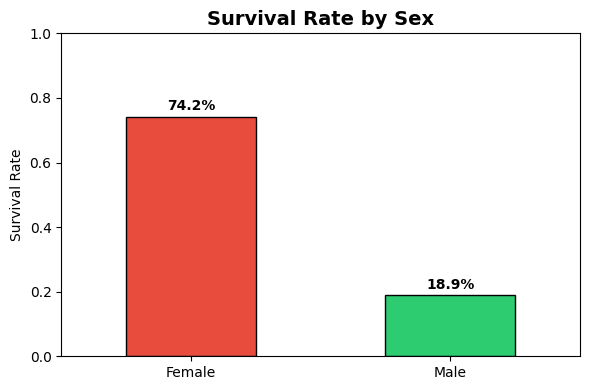

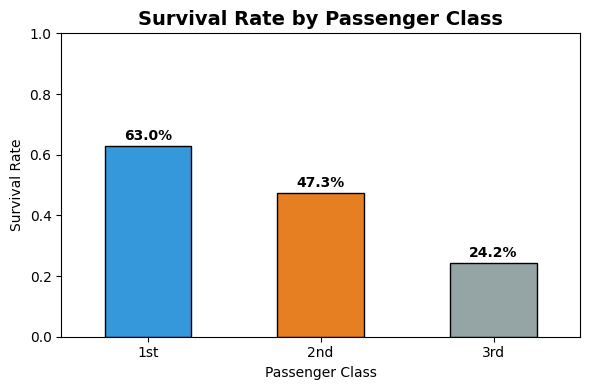

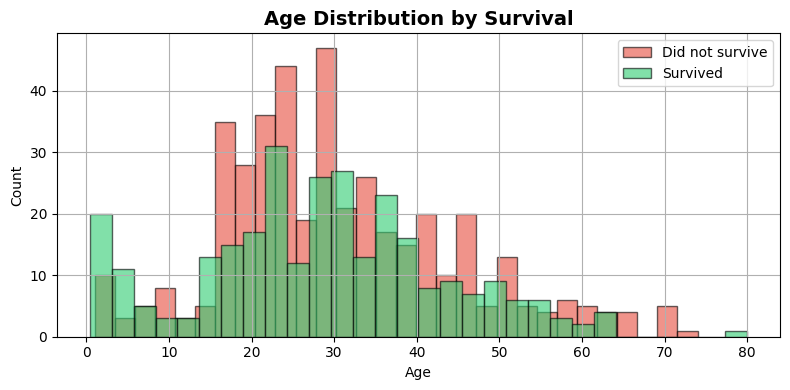

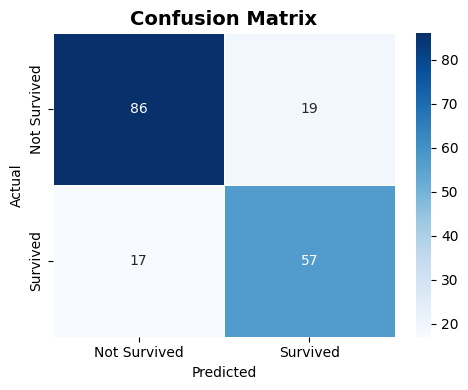

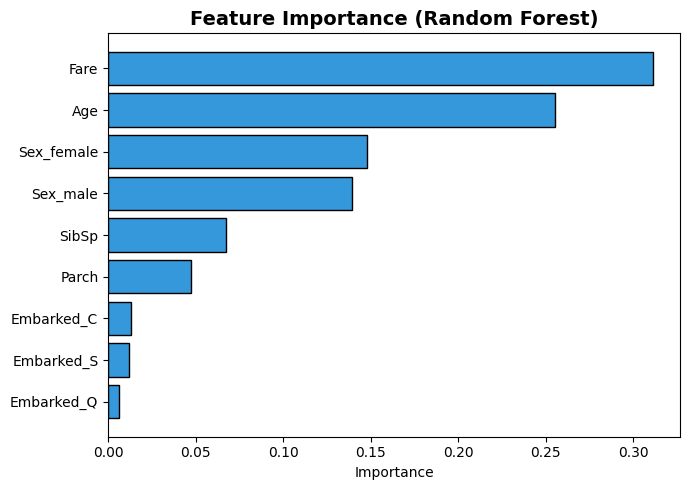

In [19]:
os.makedirs("images", exist_ok=True)

# Survival Rate by Sex
fig, ax = plt.subplots(figsize=(6, 4))
survival_by_sex = train.groupby('Sex')['Survived'].mean()
survival_by_sex.plot(kind='bar', color=['#e74c3c', '#2ecc71'], edgecolor='black', ax=ax)
ax.set_title('Survival Rate by Sex', fontsize=14, fontweight='bold')
ax.set_ylabel('Survival Rate')
ax.set_xlabel('')
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.set_ylim(0, 1)
for i, v in enumerate(survival_by_sex):
    ax.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('images/survival_by_sex.png', dpi=150)
plt.show()

# Survival Rate by Passenger Class
fig, ax = plt.subplots(figsize=(6, 4))
survival_by_class = train.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar', color=['#3498db', '#e67e22', '#95a5a6'], edgecolor='black', ax=ax)
ax.set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
ax.set_ylabel('Survival Rate')
ax.set_xlabel('Passenger Class')
ax.set_xticklabels(['1st', '2nd', '3rd'], rotation=0)
ax.set_ylim(0, 1)
for i, v in enumerate(survival_by_class):
    ax.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('images/survival_by_class.png', dpi=150)
plt.show()

# Age Distribution by Survival
fig, ax = plt.subplots(figsize=(8, 4))
train[train['Survived'] == 0]['Age'].dropna().hist(bins=30, alpha=0.6, color='#e74c3c', label='Did not survive', ax=ax, edgecolor='black')
train[train['Survived'] == 1]['Age'].dropna().hist(bins=30, alpha=0.6, color='#2ecc71', label='Survived', ax=ax, edgecolor='black')
ax.set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend()
plt.tight_layout()
plt.savefig('images/age_distribution.png', dpi=150)
plt.show()

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, preds)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'], ax=ax, linewidths=0.5)
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.tight_layout()
plt.savefig('images/confusion_matrix.png', dpi=150)
plt.show()

# Feature Importance
feature_names = numeric_features + list(clf.named_steps['preprocessor']
                                        .transformers_[1][1]
                                        .named_steps['encoder']
                                        .get_feature_names_out(categorical_features))
importances = clf.named_steps['model'].feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(7, 5))
ax.barh(range(len(indices)), importances[indices], color='#3498db', edgecolor='black')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels([feature_names[i] for i in indices])
ax.set_title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance')
plt.tight_layout()
plt.savefig('images/feature_importance.png', dpi=150)
plt.show()